In [1]:
from CBBA import CBBA_agent
from CBAA import CBAA_agent

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# For build GIF
import imageio
import os

import time

Finished


In [2]:
task_num = 40
group_num=2
for i in range(group_num):
  globals()['group{}_num'.format(i)]=5

robot_num = group_num * group0_num

task = np.random.uniform(low=0,high=30,size=(task_num,2))

robots = []
for i in range(group_num):
  robots.append([])
  for j in range(globals()['group{}_num'.format(i)]):
    robots[i].append(np.random.uniform(low=i*5, high=i*5+5, size=(1,2)))

==Iteration 0==
Auction Process
Bundle
[21, 31, 0, 1, 25, 39, 10, 7, 24, 12, 27, 34, 23, 29, 15, 14, 38, 16, 22, 18, 26, 8, 11, 9, 17, 5, 20, 3, 2, 37, 30, 13, 33, 35, 6, 28, 4, 36, 32, 19]
[31, 21, 0, 1, 25, 39, 10, 7, 24, 12, 27, 34, 23, 29, 15, 14, 38, 16, 22, 18, 26, 8, 11, 9, 17, 5, 20, 3, 2, 37, 30, 13, 33, 35, 6, 28, 4, 36, 32, 19]
[31, 21, 0, 1, 25, 39, 10, 7, 24, 12, 27, 34, 23, 29, 15, 14, 38, 16, 22, 18, 26, 8, 11, 9, 17, 5, 20, 3, 2, 37, 30, 13, 33, 35, 6, 28, 4, 36, 32, 19]
[21, 31, 0, 1, 25, 39, 10, 7, 24, 12, 27, 34, 23, 29, 15, 14, 38, 16, 22, 18, 26, 8, 11, 9, 17, 5, 20, 3, 2, 37, 30, 13, 33, 35, 6, 28, 4, 36, 32, 19]
[31, 21, 0, 1, 25, 39, 10, 7, 24, 12, 27, 34, 23, 29, 15, 14, 38, 16, 22, 18, 26, 8, 11, 9, 17, 5, 20, 3, 2, 37, 30, 13, 33, 35, 6, 28, 4, 36, 32, 19]
[0, 1, 25, 39, 10, 21, 31, 20, 18, 22, 16, 38, 14, 12, 27, 34, 23, 29, 15, 24, 7, 26, 8, 11, 9, 17, 5, 19, 36, 32, 4, 28, 2, 37, 30, 3, 13, 33, 35, 6]
[1, 0, 20, 31, 21, 25, 10, 39, 7, 24, 12, 27, 34, 23, 2

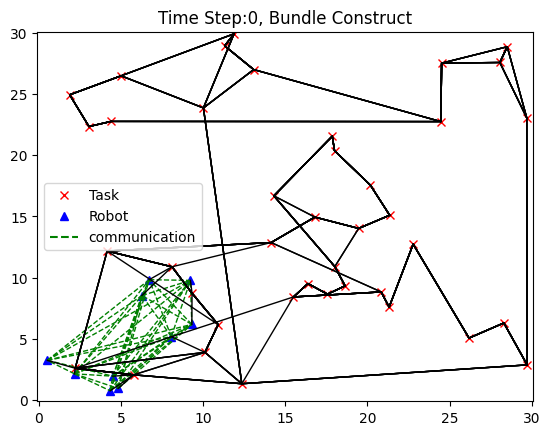

Communicating...
Consensus Process
Bundle
[21]
[]
[]
[]
[31]
[0]
[1]
[]
[39]
[25]
Path
[21]
[]
[]
[]
[31]
[0]
[1]
[]
[39]
[25]
==Iteration 1==
Auction Process
Bundle
[21, 0, 1, 25, 39, 10, 7, 24, 12, 27, 34, 23, 29, 15, 14, 38, 16, 22, 18, 26, 8, 11, 9, 17, 5, 20, 3, 2, 37, 30, 13, 33, 35, 6, 28, 4, 36, 32, 19]
[21, 0, 1, 25, 39, 10, 7, 24, 12, 27, 34, 23, 29, 15, 14, 38, 16, 22, 18, 26, 8, 11, 9, 17, 5, 20, 3, 2, 37, 30, 13, 33, 35, 6, 28, 4, 36, 32, 19]
[21, 0, 1, 25, 39, 10, 7, 24, 12, 27, 34, 23, 29, 15, 14, 38, 16, 22, 18, 26, 8, 11, 9, 17, 5, 20, 3, 2, 37, 30, 13, 33, 35, 6, 28, 4, 36, 32, 19]
[31, 0, 1, 25, 39, 10, 7, 24, 12, 27, 34, 23, 29, 15, 14, 38, 16, 22, 18, 26, 8, 11, 9, 17, 5, 20, 3, 2, 37, 30, 13, 33, 35, 6, 28, 4, 36, 32, 19]
[31, 0, 1, 25, 39, 10, 7, 24, 12, 27, 34, 23, 29, 15, 14, 38, 16, 22, 18, 26, 8, 11, 9, 17, 5, 20, 3, 2, 37, 30, 13, 33, 35, 6, 28, 4, 36, 32, 19]
[0, 20, 31, 21, 25, 39, 10, 7, 24, 12, 27, 34, 23, 29, 15, 14, 38, 16, 22, 18, 26, 8, 11, 9, 17, 5,

KeyboardInterrupt: 

In [6]:
########################
#### One-layer CBBA ####
########################

robots_1D = sum(robots,[])
robot_list = [CBBA_agent(id=i, state=robots_1D[i],vel=1, task_num=task_num, agent_num=robot_num, L_t=task.shape[0]) for i in range(robot_num)]

# Network Initialize
G = np.ones((robot_num, robot_num)) # Fully connected network
# disconnect link arbitrary

G[2,3]=0
G[3,2]=0
G[1,2]=0
G[2,1]=0
G[1,3]=0
G[3,1]=0

fig, ax = plt.subplots()
ax.set_xlim((-0.1,30.1))
ax.set_ylim((-0.1,30.1))

ax.plot(task[:,0],task[:,1],'rx',label="Task")
robot_pos = np.array([r.state[0].tolist() for r in robot_list])
ax.plot(robot_pos[:,0],robot_pos[:,1],'b^',label="Robot")

for i in range(robot_num-1):
  for j in range(i+1,robot_num):
    if G[i][j] == 1:
      ax.plot([robot_pos[i][0],robot_pos[j][0]],[robot_pos[i][1],robot_pos[j][1]],'g--',linewidth=1)

handles, labels = ax.get_legend_handles_labels()
custom_line = Line2D([0], [0], color="g",linestyle="--",label="communication")
handles.append(custom_line)
ax.legend(handles=handles)

t = 0 # Iteration number
assign_plots = []
max_t = 100
plot_gap = 0.1

save_gif = False
filenames = []

if save_gif:
  if not os.path.exists("my_gif"):
    os.makedirs("my_gif")

start = time.time()
while True:
  converged_list = []

  print("==Iteration {}==".format(t))
  ## Phase 1: Auction Process
  print("Auction Process")
  for robot_id, robot in enumerate(robot_list):
    # select task by local information
    robot.build_bundle(task)

    ## Plot
    if len(robot.p) > 0:
      x_data=[robot.state[0][0]]+task[robot.p,0].tolist()
      y_data=[robot.state[0][1]]+task[robot.p,1].tolist()
    else:
      x_data=[robot.state[0][0]]
      y_data=[robot.state[0][1]]
    if t == 0:
      assign_line, = ax.plot(x_data,y_data,'k-',linewidth=1)
      assign_plots.append(assign_line)
    else:
      assign_plots[robot_id].set_data(x_data,y_data)

  print("Bundle")
  for robot in robot_list:
    print(robot.b)
  print("Path")
  for robot in robot_list:
    print(robot.p)

  ## Plot
  ax.set_title("Time Step:{}, Bundle Construct".format(t))
  plt.pause(plot_gap)
  if save_gif:
    filename = f'{t}_B.png'
    filenames.append(filename)
    plt.savefig(filename)

  ## Communication stage
  print("Communicating...")
  # Send winning bid list to neighbors (depend on env)
  message_pool = [robot.send_message() for robot in robot_list]

  for robot_id, robot in enumerate(robot_list):
    # Recieve winning bidlist from neighbors
    g = G[robot_id]

    connected, = np.where(g==1)
    connected = list(connected)
    connected.remove(robot_id)

    if len(connected) > 0:
      Y = {neighbor_id:message_pool[neighbor_id] for neighbor_id in connected}
    else:
      Y = None

    robot.receive_message(Y)

  ## Phase 2: Consensus Process
  print("Consensus Process")
  for robot_id, robot in enumerate(robot_list):
    # Update local information and decision
    if Y is not None:
      converged = robot.update_task()
      converged_list.append(converged)

    ## Plot
    if len(robot.p) > 0:
      x_data=[robot.state[0][0]]+task[robot.p,0].tolist()
      y_data=[robot.state[0][1]]+task[robot.p,1].tolist()
    else:
      x_data=[robot.state[0][0]]
      y_data=[robot.state[0][1]]

    assign_plots[robot_id].set_data(x_data,y_data)

  ## Plot
  ax.set_title("Time Step:{}, Consensus".format(t))
  plt.pause(plot_gap)
  if save_gif:
    filename = f'./my_gif/{t}_C.png'
    filenames.append(filename)
    plt.savefig(filename)

  print("Bundle")
  for robot in robot_list:
    print(robot.b)
  print("Path")
  for robot in robot_list:
    print(robot.p)

  t += 1

  if sum(converged_list) == robot_num:
    ax.set_title("Time Step:{}, Converged!".format(t))
    break
  if t>max_t:
    ax.set_title("Time Step:{}, Max time step overed".format(t))
    break
end = time.time()

print(f"{end-start:.5f} sec")


if save_gif:
    filename = f'./my_gif/{t}_F.png'
    filenames.append(filename)
    plt.savefig(filename)

    #build gif
    files=[]
    for filename in filenames:
        image = imageio.imread(filename)
        files.append(image)
    imageio.mimsave("./my_gif/mygif.gif", files, format='GIF', fps = 0.5)
    with imageio.get_writer('./my_gif/mygif.gif', mode='I') as writer:
        for filename in filenames:
            image = imageio.imread(filename)
            writer.append_data(image)
    # Remove files
    for filename in set(filenames):
        os.remove(filename)

plt.show()


c:\Users\User\anaconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\User\anaconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


==Iteration 0==
Auction Process


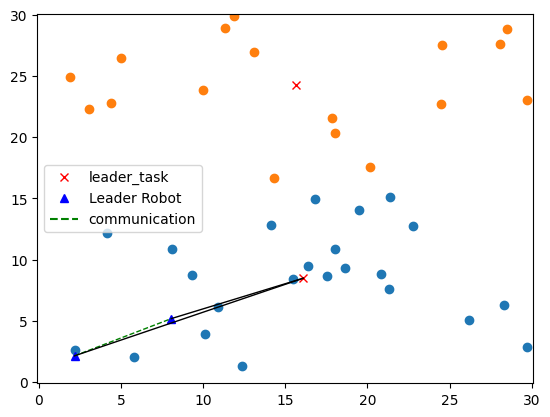

Consensus Process
False
True
==Iteration 1==
Auction Process
Consensus Process
True
True
Leader CONVERGED
==Iteration 0==
Auction Process
0
1
2
3
4
Bundle
[5, 7, 9, 13, 8, 2, 15, 11, 6, 0, 16, 10, 1, 4, 12, 14, 3]
[5, 7, 9, 13, 8, 2, 15, 11, 6, 0, 16, 10, 1, 4, 12, 14, 3]
[5, 7, 9, 13, 8, 2, 15, 11, 6, 0, 16, 10, 1, 4, 12, 14, 3]
[5, 7, 9, 13, 8, 2, 15, 11, 6, 0, 16, 10, 1, 4, 12, 14, 3]
[5, 7, 9, 13, 8, 2, 15, 11, 6, 0, 16, 10, 1, 4, 12, 14, 3]
Path
[5, 7, 9, 13, 8, 2, 15, 11, 6, 0, 16, 10, 1, 4, 12, 14, 3]
[5, 7, 9, 13, 8, 2, 15, 11, 6, 0, 16, 10, 1, 4, 12, 14, 3]
[5, 7, 9, 13, 8, 2, 15, 11, 6, 0, 16, 10, 1, 4, 12, 14, 3]
[5, 7, 9, 13, 8, 2, 15, 11, 6, 0, 16, 10, 1, 4, 12, 14, 3]
[5, 7, 9, 13, 8, 2, 15, 11, 6, 0, 16, 10, 1, 4, 12, 14, 3]


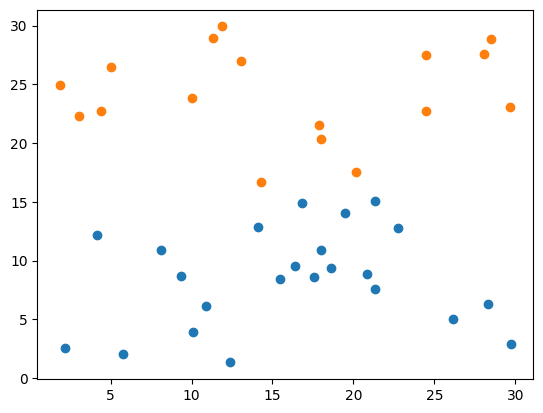

Communicating...
Consensus Process
Bundle
[]
[]
[]
[]
[5, 7, 9, 13, 8, 2, 15, 11, 6, 0, 16, 10, 1, 4, 12, 14, 3]
Path
[]
[]
[]
[]
[5, 7, 9, 13, 8, 2, 15, 11, 6, 0, 16, 10, 1, 4, 12, 14, 3]
==Iteration 1==
Auction Process
0
1
2
3
4
Bundle
[14, 3, 12, 4, 1, 0, 16, 10, 9, 7, 13, 8, 2, 15, 11, 6]
[14, 3, 12, 4, 1, 0, 16, 10, 9, 7, 13, 8, 2, 15, 11, 6]
[14, 3, 12, 4, 1, 0, 16, 10, 9, 7, 13, 8, 2, 15, 11, 6]
[14, 3, 12, 4, 1, 0, 16, 10, 9, 7, 13, 8, 2, 15, 11, 6]
[5, 7, 9, 13, 8, 2, 15, 11, 6, 0, 16, 10, 1, 4, 12, 14, 3]
Path
[14, 3, 12, 4, 1, 0, 16, 10, 9, 7, 13, 8, 2, 15, 11, 6]
[14, 3, 12, 4, 1, 0, 16, 10, 9, 7, 13, 8, 2, 15, 11, 6]
[14, 3, 12, 4, 1, 0, 16, 10, 9, 7, 13, 8, 2, 15, 11, 6]
[14, 3, 12, 4, 1, 0, 16, 10, 9, 7, 13, 8, 2, 15, 11, 6]
[5, 7, 9, 13, 8, 2, 15, 11, 6, 0, 16, 10, 1, 4, 12, 14, 3]
Communicating...
Consensus Process
Bundle
[]
[]
[]
[14, 3, 12, 4, 1, 0, 16, 10]
[5, 7, 9, 13, 8, 2, 15, 11, 6]
Path
[]
[]
[]
[14, 3, 12, 4, 1, 0, 16, 10]
[5, 7, 9, 13, 8, 2, 15, 11, 6]
==Iter

In [5]:
########################
#### Two-layer CBBA ####
########################

####################
#### Clustering ####
####################
cluster = KMeans(n_clusters=group_num)
cluster.fit(task)
cluster_task = cluster.fit_predict(task)
cluster_center_point = cluster.cluster_centers_
cluster_group_task = []
temp_group_task = cluster_task.tolist()
for i in range(len(cluster_center_point)):
    # print(np.where(cluster_task==i))
    cluster_group_task.append([t for t,value in enumerate(temp_group_task) if value==i])

#####################
#### Leader CBAA ####
#####################
# leader_list = [CBBA_agent(id=i, vel=1, task_num=len(cluster_center_point), agent_num=group_num, L_t=cluster_center_point.shape[0]) for i in range(group_num)]
leader_list = [CBAA_agent(id=i, state=robots[i][0],task=cluster_center_point) for i in range(group_num)]
# Network Initialize
G_leader = np.ones((group_num, group_num)) # Fully connected network
# disconnect link arbitrary
# G_leader[2,3]=0
# G_leader[3,2]=0
# G_leader[1,2]=0
# G_leader[2,1]=0
# G_leader[1,3]=0
# G_leader[3,1]=0

#### Plot ####
fig, ax = plt.subplots()
ax.set_xlim((-0.1,30.1))
ax.set_ylim((-0.1,30.1))

ax.plot(cluster_center_point[:,0],cluster_center_point[:,1],'rx',label="leader_task")
for i in range(group_num):
  plt.scatter(task[np.where(cluster_task==i),0],task[np.where(cluster_task==i),1])
robot_pos = np.array([r.state[0].tolist() for r in leader_list])
ax.plot(robot_pos[:,0],robot_pos[:,1],'b^',label="Leader Robot")
##############

for i in range(group_num-1):
  for j in range(i+1,group_num):
    if G_leader[i][j] == 1:
      ax.plot([robot_pos[i][0],robot_pos[j][0]],[robot_pos[i][1],robot_pos[j][1]],'g--',linewidth=1)

handles, labels = ax.get_legend_handles_labels()
custom_line = Line2D([0], [0], color="g",linestyle="--",label="communication")
handles.append(custom_line)
ax.legend(handles=handles)

t = 0 # Iteration number
assign_plots = []

start = time.time()
while True:
  converged_list = []
  print("==Iteration {}==".format(t))
  ## Phase 1: Auction Process
  print("Auction Process")
  for leader_id, leader in enumerate(leader_list):
    # select task by local information
    leader.select_task()

    if t == 0:
      assign_line, = ax.plot([leader.state[0][0],cluster_center_point[leader.J,0]],[leader.state[0][1],cluster_center_point[leader.J,1]],'k-',linewidth=1)
      assign_plots.append(assign_line)
    else:
      assign_plots[leader_id].set_data([leader.state[0][0],cluster_center_point[leader.J,0]],[leader.state[0][1],cluster_center_point[leader.J,1]])

  plt.pause(0.5)

  ## Phase 2: Consensus Process
  print("Consensus Process")
  # Send winning bid list to neighbors (depend on env)
  message_pool = [leader.send_message() for leader in leader_list]

  for leader_id, leader in enumerate(leader_list):
    # Recieve winning bidlist from neighbors
    g = G_leader[leader_id]
    connected, = np.where(g==1)
    connected = list(connected)
    connected.remove(leader_id)

    if len(connected) > 0:
        Y = {neighbor_id:message_pool[neighbor_id] for neighbor_id in connected}
    else:
        Y = None

    # Update local information and decision
    if Y is not None:
      converged = leader.update_task(Y)
      converged_list.append(converged)
      print(converged)

    # print(robot.x)

    if any(leader.x): # (list)
      assign_plots[leader_id].set_data([leader.state[0][0],cluster_center_point[leader.J,0]],[leader.state[0][1],cluster_center_point[leader.J,1]])
    else:
      assign_plots[leader_id].set_data([leader.state[0][0],leader.state[0][0]],[leader.state[0][1],leader.state[0][1]])

  plt.pause(0.5)

  t += 1

  # 모든 로봇 agent 수와 최적의 임무계획 결과 수가 같으면 모든게 합의됨.
  if sum(converged_list)==group_num:
    break

print("Leader CONVERGED")

####################
#### Group CBBA ####
####################
# Group Network Initialize
G0 = np.ones((group0_num, group0_num)) # Fully connected network
# disconnect link arbitrary

#### Group allocated task ####
for i in range(group_num):
  globals()['group{}_task'.format(i)]=task[np.array(cluster_group_task[leader_list[i].J])]
  group_task = np.array(cluster_group_task[leader_list[i].J])
  globals()['group{}_robot'.format(i)]=[CBBA_agent(id=k, state=robots[i][k], vel=1, task_num=len(globals()['group{}_task'.format(i)]), agent_num=globals()['group{}_num'.format(i)], L_t=group_task.shape[0]) for k in range(globals()['group{}_num'.format(i)])]
##############################

#### Plot ####
# plt.show()
plt.cla()
for i in range(group_num):
  plt.scatter(task[np.where(cluster_task==i),0],task[np.where(cluster_task==i),1])
robot_pos = np.array([r.state[0].tolist() for r in leader_list])
ax.plot(robot_pos[:,0],robot_pos[:,1],'b^',label="Leader Robot")

for i in range(group_num):
  group_pos = np.array

for i in range(group_num-1):
  for j in range(i+1,group_num):
    if G_leader[i][j] == 1:
      ax.plot([robot_pos[i][0],robot_pos[j][0]],[robot_pos[i][1],robot_pos[j][1]],'g--',linewidth=1)

for i in range(group_num):
  globals()['group{}_pose'.format(i)]=np.array([r.state[0].tolist() for r in globals()['group{}_robot'.format(i)]])
  ax.plot(globals()['group{}_pose'.format(i)][1:,0], globals()['group{}_pose'.format(i)][1:,1],'m^',label="follower Robot")

for k in range(group_num):
  for i in range(globals()['group{}_num'.format(k)]-1):
    for j in range(i+1,globals()['group{}_num'.format(k)]):
      if G0[i][j] == 1:
        ax.plot([globals()['group{}_pose'.format(k)][i][0],globals()['group{}_pose'.format(k)][j][0]],[globals()['group{}_pose'.format(k)][i][1],globals()['group{}_pose'.format(k)][j][1]],'k--',linewidth=1)
##############

t = 0 # Iteration number
assign_plots = []
max_t = 100
plot_gap = 0.1

save_gif = False
filenames = []

if save_gif:
  if not os.path.exists("my_gif"):
    os.makedirs("my_gif")

for r in range(group_num):
  t=0
  assign_plots.append([])
  while True:  
    converged_list = []

    print("==Iteration {}==".format(t))
    ## Phase 1: Auction Process
    print("Auction Process")
    for robot_id, robot in enumerate(globals()['group{}_robot'.format(r)]):
      # select task by local information
      print(robot_id)
      robot.build_bundle(globals()['group{}_task'.format(r)])

      ## Plot
      if len(robot.p) > 0:
        x_data=[robot.state[0][0]]+globals()['group{}_task'.format(r)][robot.p,0].tolist()
        y_data=[robot.state[0][1]]+globals()['group{}_task'.format(r)][robot.p,1].tolist()
      else:
        x_data=[robot.state[0][0]]
        y_data=[robot.state[0][1]]
      if t == 0:
        assign_line, = ax.plot(x_data,y_data,'k-',linewidth=1)
        assign_plots[r].append(assign_line)
      else:
        assign_plots[r][robot_id].set_data(x_data,y_data)

    print("Bundle")
    for robot in globals()['group{}_robot'.format(r)]:
      print(robot.b)
    print("Path")
    for robot in globals()['group{}_robot'.format(r)]:
      print(robot.p)

    ## Plot
    ax.set_title("Time Step:{}, Bundle Construct".format(t))
    plt.pause(plot_gap)
    if save_gif:
      filename = f'{t}_B.png'
      filenames.append(filename)
      plt.savefig(filename)

    ## Communication stage
    print("Communicating...")
    # Send winning bid list to neighbors (depend on env)
    message_pool = [robot.send_message() for robot in globals()['group{}_robot'.format(r)]]

    for robot_id, robot in enumerate(globals()['group{}_robot'.format(r)]):
      # Recieve winning bidlist from neighbors
      g = G0[robot_id]

      connected, = np.where(g==1)
      connected = list(connected)
      connected.remove(robot_id)

      if len(connected) > 0:
        Y = {neighbor_id:message_pool[neighbor_id] for neighbor_id in connected}
      else:
        Y = None

      robot.receive_message(Y)

    ## Phase 2: Consensus Process
    print("Consensus Process")
    for robot_id, robot in enumerate(globals()['group{}_robot'.format(r)]):
      # Update local information and decision
      if Y is not None:
        converged = robot.update_task()
        converged_list.append(converged)

      ## Plot
      if len(robot.p) > 0:
        x_data=[robot.state[0][0]]+globals()['group{}_task'.format(r)][robot.p,0].tolist()
        y_data=[robot.state[0][1]]+globals()['group{}_task'.format(r)][robot.p,1].tolist()
      else:
        x_data=[robot.state[0][0]]
        y_data=[robot.state[0][1]]

      assign_plots[r][robot_id].set_data(x_data,y_data)

    ## Plot
    ax.set_title("Time Step:{}, Consensus".format(t))
    plt.pause(plot_gap)
    if save_gif:
      filename = f'./my_gif/{t}_C.png'
      filenames.append(filename)
      plt.savefig(filename)

    print("Bundle")
    for robot in globals()['group{}_robot'.format(r)]:
      print(robot.b)
    print("Path")
    for robot in globals()['group{}_robot'.format(r)]:
      print(robot.p)

    t += 1

    if sum(converged_list) == group0_num:
      ax.set_title("Time Step:{}, Converged!".format(t))
      break
    if t>max_t:
      ax.set_title("Time Step:{}, Max time step overed".format(t))
      break
end = time.time()

print(f"{end-start:.5f} sec")

if save_gif:
    filename = f'./my_gif/{t}_F.png'
    filenames.append(filename)
    plt.savefig(filename)

    #build gif
    files=[]
    for filename in filenames:
        image = imageio.imread(filename)
        files.append(image)
    imageio.mimsave("./my_gif/mygif.gif", files, format='GIF', fps = 0.5)
    with imageio.get_writer('./my_gif/mygif.gif', mode='I') as writer:
        for filename in filenames:
            image = imageio.imread(filename)
            writer.append_data(image)
    # Remove files
    for filename in set(filenames):
        os.remove(filename)

plt.show()